In [75]:
%reset -f

In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [77]:
def updateFile_delete_str(file):
    
    file_data = ""
    
    str_delete = ['Apparent','Current','and','but','Suggest','Error','***','caused','Parameter','***Warning:','Due','X11']
    
    with open(file, "r") as input:
        lines = input.readlines()
        for line in lines:
            if '!XSPEC12>steppar' in line:
                    line = line.replace('!XSPEC12>steppar','!XSPEC12> steppar')
            if 'XSPEC12>steppar' in line:
                    line = line.replace('XSPEC12>steppar','XSPEC12> steppar')
            if line.split() == []:
                continue
            if line.split()[0] not in str_delete:
                file_data += line
    
    with open(file,"w",encoding="utf-8") as output:
        output.write(file_data)

In [78]:
def updateFile_delete_hashtag_and_blanck_line(file):
    
    file_data = ""
    with open(file,"r", encoding="utf-8") as f:
            lines = f.readlines()
            for line in lines:
                if '#' in line:
                    line = line.replace('#','')
                if line == '\n':
                    line = line.strip("\n")           
                file_data += line
    
    with open(file,"w",encoding="utf-8") as f:
        f.write(file_data)  

In [79]:
def get_chisq_with_pars(infile):
    f = open(infile, 'r')
    lines = f.readlines()
    z = []
    for line in lines:
        if len(line.split()) == 6:
            z.append([float(line.split()[3]),#x_value
                      float(line.split()[5]),#y_value
                      float(line.split()[0]),#z_value
                      int(line.split()[2]),#x_index
                      int(line.split()[4])#y_index
                     ])            
    return z

In [80]:
def get_par1(infile):
    f = open(infile, 'r')
    lines = f.readlines()
    x_str = []
    for line in lines:
        if len(line.split()) == 6:
            x_str.append(line.split()[3])
    x = list(map(float, x_str))
    return x

In [81]:
def get_par_names(infile):
    f = open(infile, 'r')
    lines = f.readlines()
    names = [None]*2
    for line in lines:
        if line.split()[0] == 'Chi-Squared' and line.split()[1] == 'Delta':
            names[0] = line.split()[2]
            names[1] = line.split()[3]
    return names

In [82]:
def get_par2(infile):
    f = open(infile, 'r')
    lines = f.readlines()
    x_str = []
    for line in lines:
        if len(line.split()) == 6:
            x_str.append(line.split()[-1])
    x = list(map(float, x_str))
    return x

In [83]:
def get_grid(infile):
    f = open(infile, 'r')
    lines = f.readlines()
    for line in lines:
        if len(line.split()) <= 1:
            continue
        if line.split()[1] == 'steppar':
            # head line example: XSPEC12 steppar 8 0.001 0.18 20 18 0.001 0.15 20
            x_low, x_high, num_x_grid = float(line.split()[3]), float(line.split()[4]), int(line.split()[5])
            y_low, y_high, num_y_grid = float(line.split()[7]), float(line.split()[8]), int(line.split()[9])
    x_grid = np.linspace(x_low, x_high, num = num_x_grid, dtype = None)
    y_grid = np.linspace(y_low, y_high, num = num_y_grid, dtype = None)
    return x_grid, y_grid

In [84]:
def plot_density_contour(infile,mytitle='Steppar Contour Plot',p=0.5,N=20):
    
    updateFile_delete_hashtag_and_blanck_line(infile)
    updateFile_delete_str(infile)

    names = get_par_names(infile)

    x_grid, y_grid = get_grid(infile)

    Z = np.ndarray(shape = (len(y_grid),len(x_grid)), dtype = float)
    # 这里y_grid要在前面, 不然不对.

    z_value = get_chisq_with_pars(infile)

    z_max = z_value[0][2]
    z_min = z_value[0][2]

    for z in z_value:
        if z[2] > z_max:
            z_max = z[2]
        if z[2] < z_min:
            z_min = z[2]

    for i in range(len(x_grid)):
        for j in range(len(y_grid)):
            for k in range(len(z_value)):
                if z_value[k][3] == i and z_value[k][4] == j:
                    Z[j][i] = z_value[k][2]

    X, Y = np.meshgrid(np.array(x_grid), np.array(y_grid))

    fig,ax = plt.subplots(1,1)
    conpl = ax.contourf(X, Y, Z,levels = np.linspace(z_min,p*z_max+(1-p)*z_min,N), extend = 'both')
    fig.colorbar(conpl)
    ax.set_title(mytitle)
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    # plt.savefig(infile + '.pdf')
    plt.show()
    fig.savefig(mytitle + ".pdf")
    
    return conpl

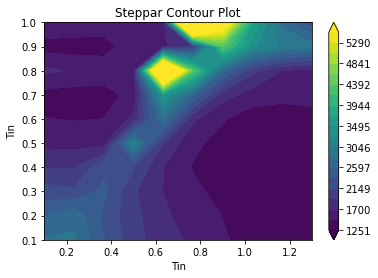

In [85]:
# # plot_density_contour('diskbb_a_i.txt',p=0.15,N=10)
# # plot_density_contour('kerrbb_a_i.txt',p=0.008,N=10)
# plot_density_contour('kerr_free_a_i.txt',p=0.2,N=20)
# plot_density_contour('simp-kerr-relCp_a-i_con.txt',p=0.05)
plot_density_contour('steppar.txt')